In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

from model import CNN
from torch import nn
from PIL import Image
from torchvision import transforms


/homes/gws/mingyulu/miniconda3/envs/torch_gpu/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_probabilities_for_digit(model, images, device, digit=1):
    # Ensure the model is in evaluation mode
    model.eval()
    
    # Ensure the images are on the same device as the model
    images = images.to(device)
    
    # Pass the batch of images through the model
    outputs, _ = model(images)
    
    # Apply softmax to the outputs to get probabilities
    probabilities = nn.functional.softmax(outputs, dim=1)
    
    # Extract the probabilities for the given digit
    prob_digit = probabilities[:, digit]
    
    return prob_digit

def process_image(img_path):
    
    img = Image.open(img_path)
    img_gray = img.convert("L")
    digit_size = img_gray.size[0] // 6
    digits = []
    
    for i in range(6):
        for j in range(6):
            left = i * digit_size
            upper = j * digit_size
            right = left + digit_size
            lower = upper + digit_size
            digit = img_gray.crop((left, upper, right, lower))
            digit_resized = digit.resize((28, 28))
            digits.append(digit_resized)
            
    return digits

def plotting_mnist(directory, target_digit=1):
    
    device = "cuda:1"
    cnn = CNN().to(device)
    cnn.load_state_dict(torch.load('models/epochs=10_cnn_weights.pt'))
    cnn.eval()
    
    def get_number_from_filename(filename):
        return int(filename.split("_")[1].split(".")[0])

    all_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    valid_images = [f for f in all_files]
    sorted_images = sorted(valid_images, key=get_number_from_filename)
    
    min_step = get_number_from_filename(sorted_images[0])
    max_step = get_number_from_filename(sorted_images[-1])
    
    desired_steps = [min_step]
    
    while desired_steps[-1] < max_step:
        desired_steps.append(desired_steps[-1] * 2)
    selected_images = [min(sorted_images, key=lambda img: abs(get_number_from_filename(img) - step)) for step in desired_steps]

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # MNIST normalization
    ])

    plt.figure(figsize=(30, 5))
    for idx, img_path in enumerate(selected_images):
        digit_images = process_image(os.path.join(directory, img_path))
    
        probs = []
        
        with torch.no_grad():
            for digit_img in digit_images:
                input_tensor = transform(digit_img).unsqueeze(0).to(device)
                outputs = torch.nn.functional.softmax(cnn(input_tensor)[0], dim=1)
                prob = outputs[0][target_digit].item()
                probs.append(prob)
        
        avg_prob = sum(probs) / len(probs)
        
        plt.subplot(1, len(desired_steps), idx + 1)
        plt.imshow(np.array(Image.open(os.path.join(directory, img_path))))
        plt.title(f"Steps - {get_number_from_filename(img_path)} \n Avg. Prob for {target_digit}: {avg_prob:.4f}")
        plt.axis('off')
    # plt.tight_layout()
    plt.show()


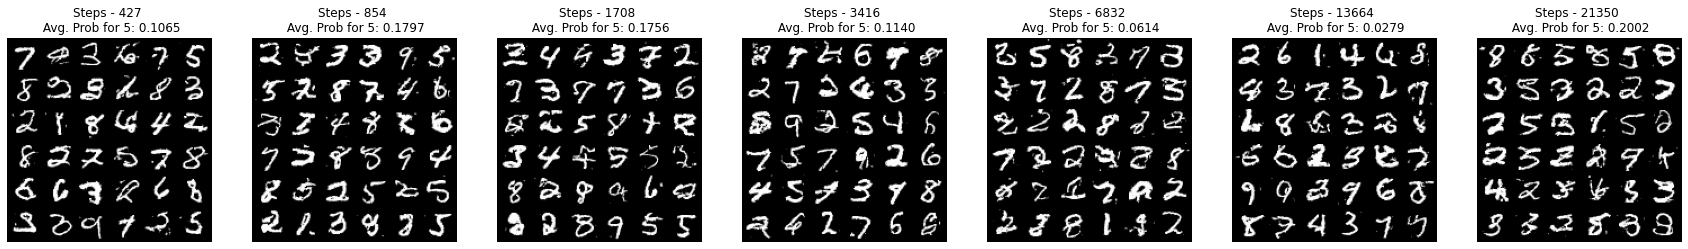

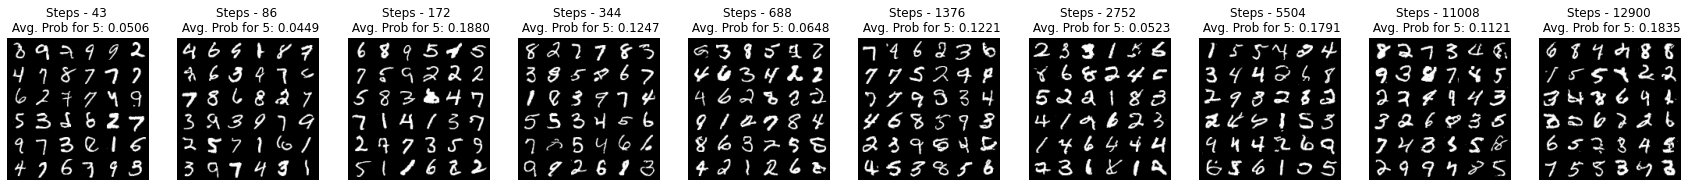

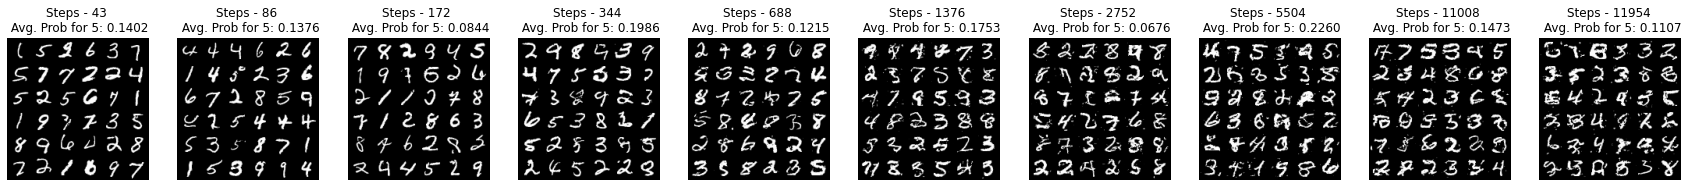

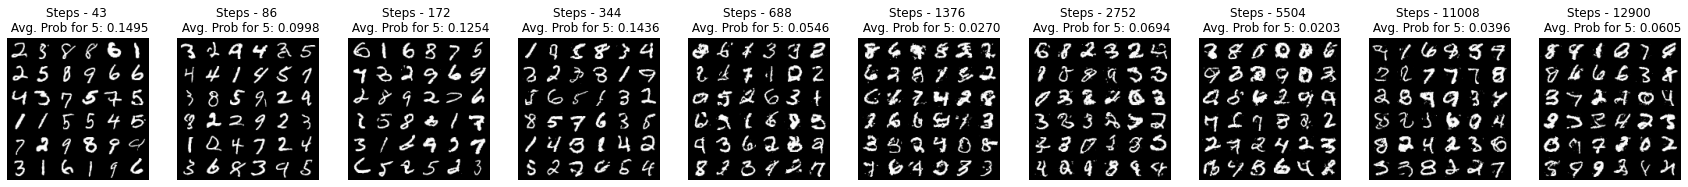

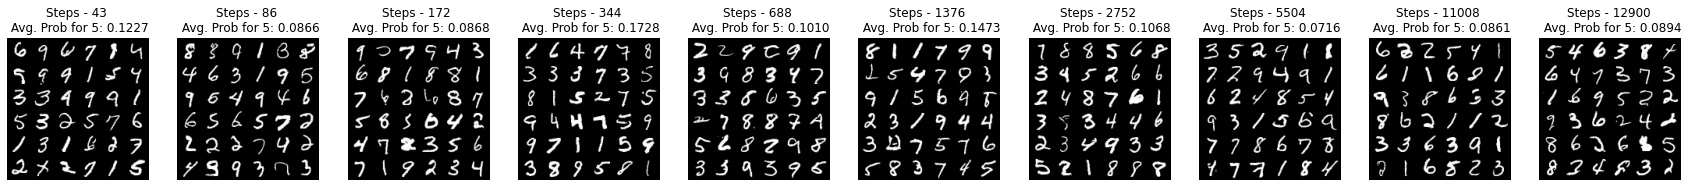

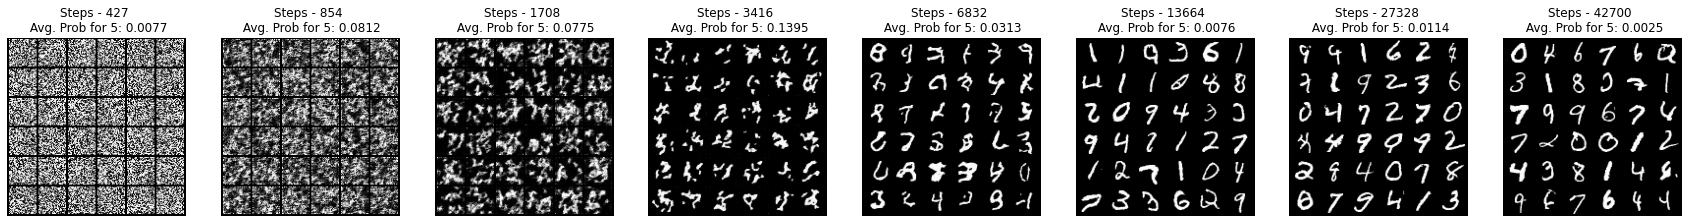

In [3]:
digits= 5

path = f"results/unlearn_remaining_ablated/{digits}"

directory = path+"/epochs=50_datasets=False_loss=type1:alpha1=1_alpha2=0.2/samples"
plotting_mnist(directory, digits)

directory = path+"/epochs=300_loss=type1:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory, digits)

directory = path + "/epochs=300_loss=type2:alpha1=1_alpha2=0.5/samples"
plotting_mnist(directory, digits)

directory = path + "/epochs=300_loss=type3:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory, digits)

directory = path + "/epochs=300_loss=type4:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory, digits)

# ground truth

plotting_mnist(f"results/ablated/{digits}/samples", digits)

# directory = f"full/samples"
# plotting_mnist(directory, cnn, device, digits)

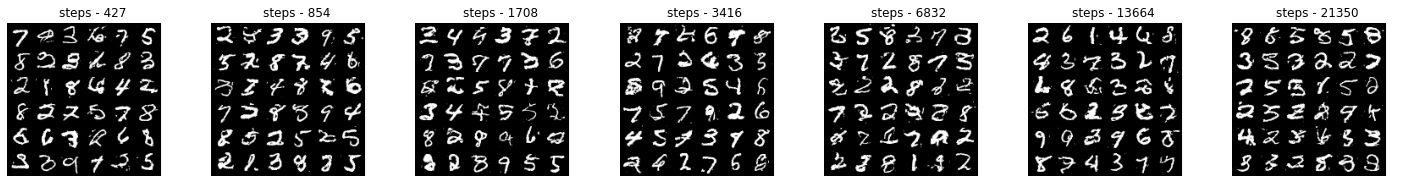

In [140]:
digits = 5

directory = f"unlearn_remaining_ablated/{digits}/epochs=50_datasets=False_loss=type1:alpha1=1_alpha2=0.2/samples"
plotting_mnist(directory)

# Removing with type 1 loss

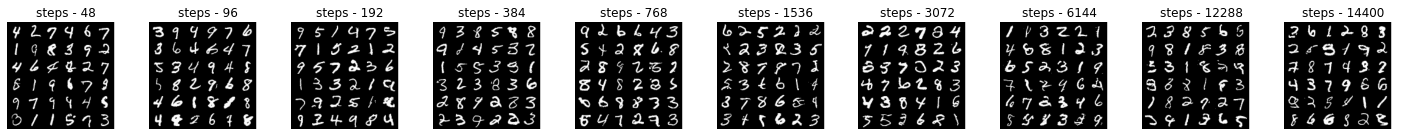

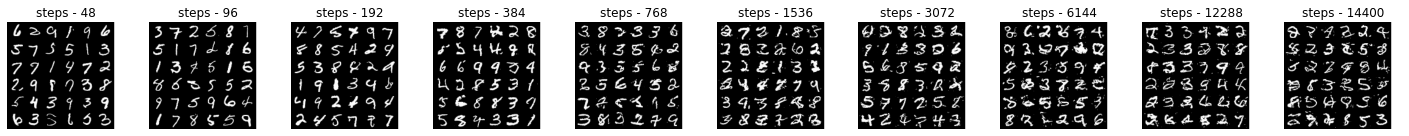

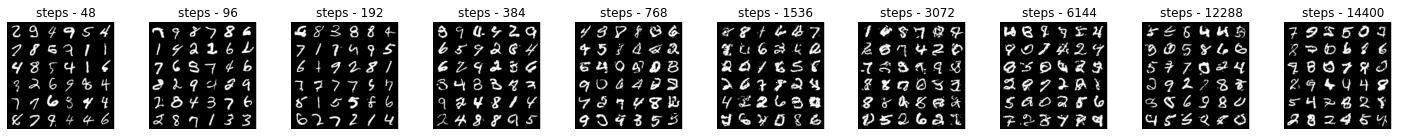

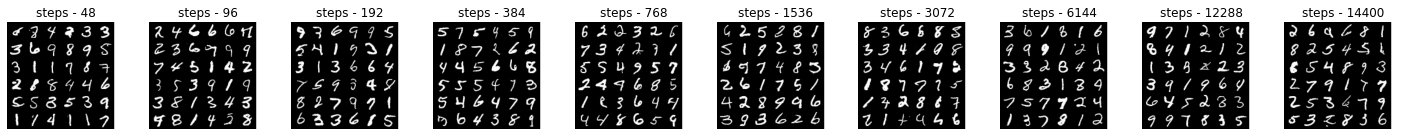

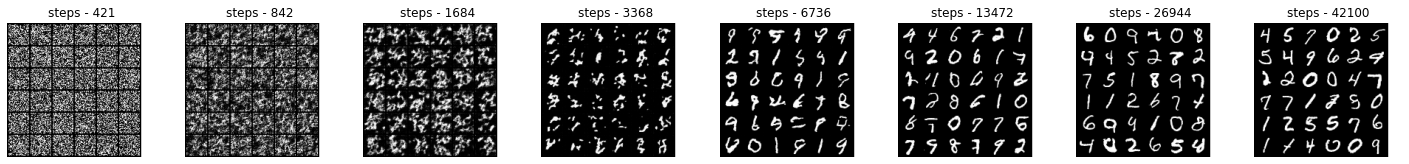

In [133]:
digits = 3

directory = f"unlearn_remaining_ablated/{digits}/epochs=300_loss=type1:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory)

directory = f"unlearn_remaining_ablated/{digits}/epochs=300_loss=type2:alpha1=1_alpha2=0.5/samples"
plotting_mnist(directory)

directory = f"unlearn_remaining_ablated/{digits}/epochs=300_loss=type3:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory)

directory = f"unlearn_remaining_ablated/{digits}/epochs=300_loss=type4:alpha1=1_alpha2=0.1/samples"
plotting_mnist(directory)

directory = f"ablated/{digits}/samples"
plotting_mnist(directory)

## Removing with type2 loss

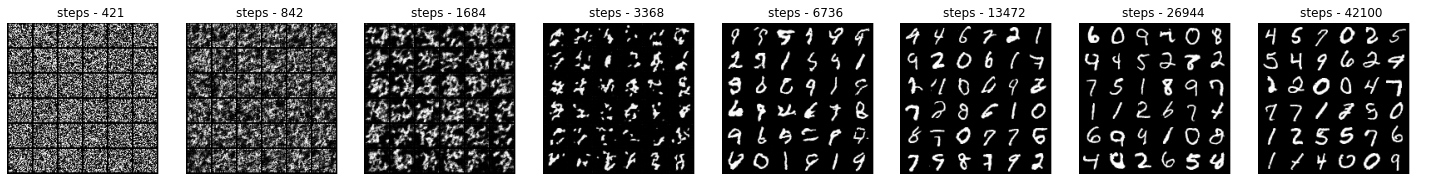

In [55]:
directory = f"ablated/{digits}/samples"

